# Exploratory Data Analysis - MovieLens Dataset

# Akash Yadav
# 200968184
# BATCH 4

In [6]:
# This is part of the project submission for making a movie recommeder system on the dataset MovieLens small under guidance of Dr Rohini rao ma'am.
# This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org),
# a movie recommendation service. 

# Users were selected at random for inclusion. All selected users had rated at least 20 movies. 
# No demographic information is included. Each user is represented by an id, and no other information is provided.
# The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`.
# More details about the contents and use of all these files follows.
# This is a *development* dataset.
# It contains 100836 ratings and 3683 tag applications across 9742 movies. 
# These data were created by 610 users between March 29, 1996 and September 24, 2018. 
# This dataset was generated on September 26, 2018.


## Metadata

userId: Anonymised ids to represent a user
    movieId: Ids representing movies rated by user & is consistent across `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`

#### Ratings Data File Structure (ratings.csv):
    It contains:

    userId,movieId,rating,timestamp

    Ratings: made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

    Timestamps: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Tags Data File Structure (tags.csv):
    It contains:

    userId,movieId,tag,timestamp

    Tags: User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

    Timestamps: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Movies Data File Structure (movies.csv):
    It contains:
    movieId,title,genres

    Movie titles: Entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

    Genres are:

        * Action
        * Adventure
        * Animation
        * Children's
        * Comedy
        * Crime
        * Documentary
        * Drama
        * Fantasy
        * Film-Noir
        * Horror
        * Musical
        * Mystery
        * Romance
        * Sci-Fi
        * Thriller
        * War
        * Western

In [7]:
#Importing the necessary libraries
import numpy as np; 
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [8]:
#Importing the dataset and creating pandas dataframes from the dataset 
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
#Extracting the year of release from the title
movies['Year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)
movies.head()

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
#Merging the usefull csv files for exploratory data analysis
movie_rating = pd.merge(movies, ratings , on = 'movieId')

movie_rating.drop('timestamp', inplace=True, axis=1)

In [14]:
movie_rating.describe()

,movieId,userId,rating
count,100836.000000,100836.000000,100836.000000
mean,19435.295718,326.127564,3.501557
std,35530.987199,182.618491,1.042529
min,1.000000,1.000000,0.500000
25%,1199.000000,177.000000,3.000000
50%,2991.000000,325.000000,3.500000
75%,8122.000000,477.000000,4.000000
max,193609.000000,610.000000,5.000000


In [15]:
movie_rating.tail()

,movieId,title,genres,Year,userId,rating
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,184,3.5
100833,193585,Flint (2017),Drama,2017,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,184,3.5
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991,331,4.0


In [16]:
print(f'Number of rows: {movie_rating.shape[0]}')
print(f'Number of columns: {movie_rating.shape[1]}')

Number of rows: 100836
Number of columns: 6


In [17]:
#Dropping Missing Values
print('Number of missing values in movieid: {}'.format(movies['movieId'].isna().sum()))
movies.dropna(subset=['movieId'], inplace=True)
print('Number of missing values in imdb_id after drop: {}'.format(movies['movieId'].isna().sum()))

Number of missing values in movieid: 0
Number of missing values in imdb_id after drop: 0


In [18]:
#Removing duplicates
cond = movies['movieId'].duplicated(keep=False)
movies.loc[cond, ['movieId','title',]].sort_values('movieId').head(10)

,movieId,title


In [19]:
#Getting unique values of genres
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [20]:
genres_df = movie_rating.loc[movie_rating['genres'].isin(
    ['Sci-Fi', 'Action', 'Drama', 'Animation', 'Children','Comedy', 'Romance', 
     'Thriller', 'Horror',  'Crime', 'Adventure'])]
mean_ratings = genres_df.groupby([ 'genres'], as_index=False)['rating'].agg(['mean', 'std', 'count'])
mean_ratings

,mean,std,count
genres,,,
Action,2.935484,1.073579,186
Adventure,2.710526,1.004376,19
Animation,3.957143,1.059768,35
Children,2.500000,1.035098,8
Comedy,3.197888,1.107383,7196
Crime,3.523810,0.941756,21
Drama,3.688841,0.920846,6291
Horror,3.060156,1.211534,640
Romance,3.048387,1.066285,62


In [21]:
#10 most rated movies
top_ten_movies = movie_rating.groupby('title').size().sort_values(ascending=False)[:10]
top_ten_movies

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

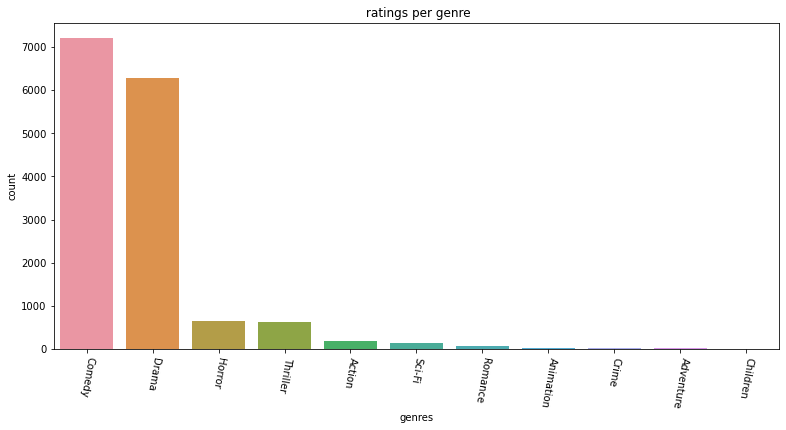

In [22]:
plt.subplots(figsize=(13,6))
sns.countplot(x='genres', order = genres_df['genres'].value_counts().index, data=genres_df);
plt.xticks(rotation=-100)
plt.title(' ratings per genre');

In [23]:
movie_rating.head()

,movieId,title,genres,Year,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5


In [24]:
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


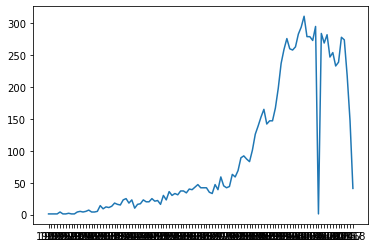

Max No.of Movies Released = 311
Year = 2002


count    107.000000
mean      90.934579
std      102.122223
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64

In [25]:
## UserRating - by Genre
## Analysis with the year

#Ploting a Graph with No.of Movies each Year corresponding to its Year
plt.plot(movies.groupby('Year').title.count())
plt.show()
a=movies.groupby('Year').title.count()
print('Max No.of Movies Released =', a.max())
for i in a.index:
    if a[i] == a.max():
        print('Year =',i)
a.describe()

Max No.of Movies Relesed = 311
Year = 2002





count    107.000000
mean      90.934579
std      102.122223
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64

In [26]:
# Visualizing overall ratings by user
groupby_ratings = ratings.groupby('userId')

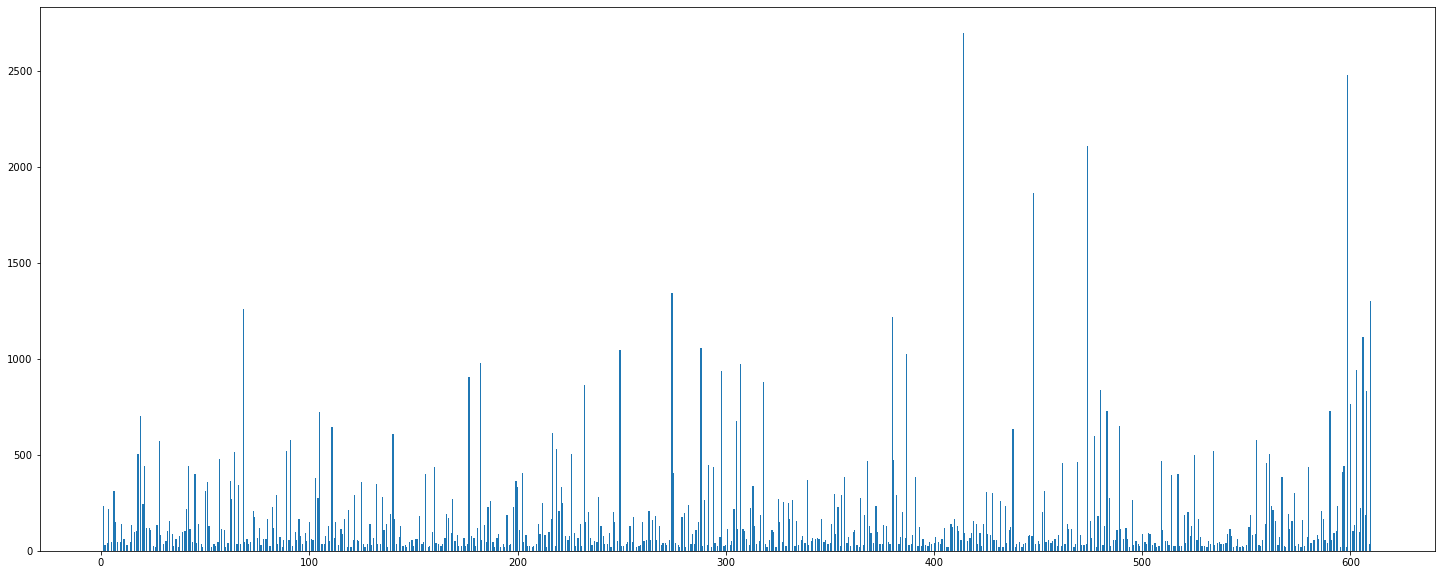

In [27]:
plt.figure(figsize = (25, 10))
plt.hist(x = [ratings.userId], bins = 1000)
plt.show()

In [28]:
#Rating given to each movie by each user
ratingspivot=ratings.pivot_table(index='userId', columns='movieId', values='rating')
ratingspivot

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
arrrating = ratingspivot.to_numpy()
arrrating

array([[4. , nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [2.5, 2. , 2. , ..., nan, nan, nan],
       [3. , nan, nan, ..., nan, nan, nan],
       [5. , nan, nan, ..., nan, nan, nan]])

In [30]:
arrrating[np.isnan(arrrating)]=0
arrrating

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [31]:
#Similiarity between each user
arrrating = 1-pairwise_distances(arrrating, metric="cosine")
arrrating

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [32]:
arrrating.shape

(610, 610)

# Merge user and rating


#### Objectives:-
- create a recommendation system using the **movielens** dataset
- use collaborative filtering and content based recommendation to suggest movies to users
- build an app with a simple UI and build an API for the model



#### Tech Stack:- 
- Python: scikit-learn, pandas, matplotlib, streamlit, SQLite3
- API: FastAPI


#### App:-
- the application will have user login and sign up page through which the users can access the home page
- the home page will have a search bar to search for movies